In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

**Exiercise 1** 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (20 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. (10 points)

Note that the approximation is broken down into:
1. f(x0) = the function defined at the lower bound of the interval
2. f(xn) = the function defined at the upper bound of the interval
3. sum(f(x2j)) = the summation of all the even indexes of our list of x's
4. sum(f(2j-1)) = the summation of all the odd indexes of our list of x's

In [3]:
def simpsons(f, a, b, n=100):
    """simpsons rule approximates a definite integral by splitting up the interval into several smaller intervals"""
    h = (b-a)/(n)
    x = np.linspace(a,b,n+1)
    return(h/3*(f(a) + 2*f(x[2:-1:2]).sum() + 4*f(x[1:-1:2]).sum() + f(b)))

In [16]:
print("The estimated probability mass of the standard normal distribution from [-1,1] is:",simpsons(norm.pdf,-1,1,n=100))

The estimated probability mass of the standard normal distribution from [-1,1] is: 0.682689492998


**Exercise 2**

- Implement a gradient descent algorithm to find the minimum of a function. The gradient descent algorithm starts with some given starting point $x_0$, then updates 

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

where $\nabla f_{x_k}$ is the gradient of $f$ ad $x_{k}$ and $\alpha$ is a parameter known as the learning rate. Write a function `gd1(x0, f, fprime, alpha=0.0002, tol=1e-6, max_iter=10000)` that stops when the norm of the step $x_{k+1} - x_k$ less than `tol` or the number of iterations exceeds `max_iter`. The function should return the value of $x_k$ in a list or array. (30 points)

Given
```python
def f(x):
    """Function to minimize."""
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
```

- Use the `gd1` function to find the minimum value of the function `f` given starting at $x_0 = (4,-4)$ (5 points)
- Make a contour plot of the function and plot the path taken by $x_k$ on the plot. (15 points)

There have been many attempts to improve gradient descent, which is widely used in machine learning. One idea is to add momentum $\nu$ to the update step

$$\nu_{k+1} = \gamma \nu{k} + \alpha \nabla f(x_k - \gamma \nu_k) 
$$ 

$$
x_{k+1} = x_{k} - \nu_{k+1}
$$

- Implement `gd2(x0, f, fprime, alpha=0.001, gamma=0.9, tol=1e-6, max_iter=10000)` with the momentum update. (15 points)
- Compare the end-point reached by `gd1` and `gd2` for the function `f`  starting at $x_0 = (4,-4)$. Which is closer to the true minimum (i.e. the function value at $x$ is close to the true minimum). (5 points)

This function has a minimum value of 0 at the point (1,1).

In [6]:
def f(x):
    """Function to minimize."""
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

In [7]:
def gradient(f, x, dx = 10**(-10)):
    """gradient computationally approximates a bivariate function's derivative"""
    dfx = (f([x[0] + dx, x[1]]) - f(x))/dx
    dfy = (f([x[0], x[1] + dx]) - f(x))/dx
    return np.array([dfx, dfy])

In [8]:
 def gd1(x0, f, fprime, alpha=0.0001, tol=1e-6, max_iter=10000):
        """gd1 is a gradient descent algorithm that takes a function and a starting point, then approximates
    the minimum of the function"""
        xk = [x0]
        for i in range(max_iter):
            xk.append(xk[-1] - alpha*fprime(f,xk[-1]))
            if(np.linalg.norm(xk[-1] - xk[-2]) < tol):
                return xk
        return xk

In [9]:
xks = gd1(np.array([4,-4]), f, gradient)
print("The final xk values are: ", xks[-1])

The final xk values are:  [ 0.6708175   0.44841652]


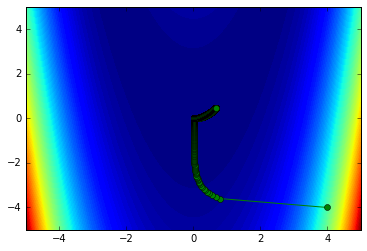

In [10]:
xp = np.linspace(-5,5,100)
yp = np.linspace(-5,5,100)
X, Y = np.meshgrid(xp, yp)
z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(100,100)
plt.contourf(X,Y,z, 100);
tmp = np.array(xks)
plt.plot(tmp[:,0], tmp[:,1], 'o-', color='green');

In [11]:
def gd2(x0, f, fprime, alpha=0.0001, gamma=0.9, tol=1e-6, max_iter=10000):
    """gd2 is a gradient descent algorithm that takes a function and a starting point, then approximates
    the minimum of the function but uses momentum to hasten the process"""
    xk = [x0]
    vk = np.array([0,0])
    for i in range(max_iter):
        vk = (gamma*vk + alpha*fprime(f,xk[-1] - gamma*vk))
        xk.append(xk[-1] - vk)
        if(np.linalg.norm(xk[-1] - xk[-2]) < tol):
            return xk
    return xk

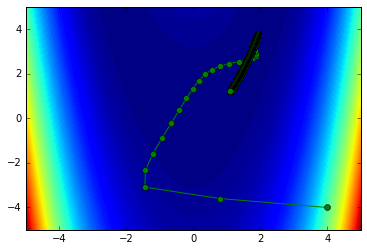

In [12]:
xks2 = gd2(np.array([4,-4]),f,gradient)
tmp2 = np.array(xks2);
plt.contourf(X,Y,z, 100);
plt.plot(tmp2[:,0], tmp2[:,1], 'o-', color='green');

In [13]:
print("GD1 End-Point: ", xks[-1],"\nGD2 End-Point:  ",xks2[-1])

GD1 End-Point:  [ 0.6708175   0.44841652] 
GD2 End-Point:   [ 1.09788161  1.20571331]


Since the minimum of the function is zero at point (1,1), we can see that gd2 got a closer approximation to the correct minimum.